In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns


%matplotlib inline

In [2]:
# Files to Load
listings_df= pd.read_csv(r"C:\Users\polska2207\Downloads\listings (2).csv")
listings_df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3686,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,4645,Vita,NaN,Historic Anacostia,38.863390,-76.988890,Private room,67.0,31,84,2023-08-30,0.53,1,365,3,NaN
1,3943,Townhouse in Washington · ★4.83 · 1 bedroom · ...,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.911950,-77.004560,Private room,66.0,1,495,2023-11-22,2.78,5,252,46,Hosted License: 5007242201001033
2,4197,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.887190,-76.994720,Private room,135.0,7,58,2023-11-11,0.33,2,321,6,Hosted License: 5007242201000749
3,4529,Home in Washington · ★4.66 · 1 bedroom · 1 bed...,5803,Bertina,NaN,"Eastland Gardens, Kenilworth",38.905850,-76.944690,Private room,56.0,30,102,2019-07-05,0.58,2,179,0,Exempt
4,4967,Home in Washington · ★4.74 · 1 bedroom · 1 bed...,7086,Edward,NaN,"Ivy City, Arboretum, Trinidad, Carver Langston",38.912170,-76.992490,Private room,2500.0,1125,30,2016-09-22,0.19,3,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,1047064894296117631,Rental unit in Washington · ★New · 1 bedroom ·...,107434423,Blueground,NaN,"Shaw, Logan Circle",38.906922,-77.024228,Entire home/apt,173.0,32,0,NaN,NaN,234,105,0,NaN
6849,1047730533367174366,Home in Washington · ★New · 1 bedroom · 1 bed ...,437660791,Eddie-HostelChic,NaN,"Brightwood Park, Crestwood, Petworth",38.949640,-77.016980,Private room,79.0,1,0,NaN,NaN,28,267,0,Exempt
6850,1047772826607759074,Rental unit in Washington · ★New · 1 bedroom ·...,437660791,Eddie-HostelChic,NaN,"Brightwood Park, Crestwood, Petworth",38.951456,-77.016104,Entire home/apt,87.0,1,0,NaN,NaN,28,270,0,Exempt
6851,1047777612294831826,Rental unit in Washington · ★New · 1 bedroom ·...,437660791,Eddie-HostelChic,NaN,"Brightwood Park, Crestwood, Petworth",38.951410,-77.016220,Entire home/apt,79.0,1,0,NaN,NaN,28,270,0,Exempt


In [3]:
# Read in Listings data
listings = pd.read_csv(r"C:\Users\polska2207\Downloads\listings (2).csv")
# Check shape for total number of listings
listings.shape

(6853, 18)

In [4]:
# Look at Listings data
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3686,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,4645,Vita,NaN,Historic Anacostia,38.86339,-76.98889,Private room,67.0,31,84,2023-08-30,0.53,1,365,3,NaN
1,3943,Townhouse in Washington · ★4.83 · 1 bedroom · ...,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91195,-77.00456,Private room,66.0,1,495,2023-11-22,2.78,5,252,46,Hosted License: 5007242201001033
2,4197,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.88719,-76.99472,Private room,135.0,7,58,2023-11-11,0.33,2,321,6,Hosted License: 5007242201000749
3,4529,Home in Washington · ★4.66 · 1 bedroom · 1 bed...,5803,Bertina,NaN,"Eastland Gardens, Kenilworth",38.90585,-76.94469,Private room,56.0,30,102,2019-07-05,0.58,2,179,0,Exempt
4,4967,Home in Washington · ★4.74 · 1 bedroom · 1 bed...,7086,Edward,NaN,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91217,-76.99249,Private room,2500.0,1125,30,2016-09-22,0.19,3,365,0,NaN


In [5]:
# how many unique listings are there
listings['id'].nunique()
# same size as df

6853

In [6]:
#Summary Stats
#Look at describe stats
listings.describe()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.853000e+03,6.853000e+03,0.0,6853.000000,6853.000000,5995.000000,6853.000000,6853.000000,5365.000000,6853.000000,6853.000000,6853.000000
mean,3.176959e+17,1.316931e+08,NaN,38.910193,-77.013581,194.011676,18.826208,55.743178,1.852078,26.533927,170.040712,13.537867
std,4.164083e+17,1.561191e+08,NaN,0.024760,0.030734,557.907916,39.064745,94.543588,1.960745,60.489484,142.538398,21.431373
min,3.686000e+03,4.492000e+03,NaN,38.819950,-77.112690,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.284937e+07,1.720706e+07,NaN,38.897418,-77.032860,86.000000,2.000000,1.000000,0.340000,1.000000,0.000000,0.000000
50%,4.750696e+07,5.593934e+07,NaN,38.909700,-77.014860,120.000000,3.000000,15.000000,1.240000,2.000000,169.000000,2.000000
75%,7.854032e+17,1.932459e+08,NaN,38.923230,-76.994200,177.000000,31.000000,69.000000,2.810000,13.000000,324.000000,20.000000
max,1.047931e+18,5.510398e+08,NaN,38.992140,-76.910920,10000.000000,1125.000000,954.000000,28.480000,234.000000,365.000000,285.000000


In [7]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [8]:
# Look at info stats
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6853 entries, 0 to 6852
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6853 non-null   int64  
 1   name                            6853 non-null   object 
 2   host_id                         6853 non-null   int64  
 3   host_name                       6853 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6853 non-null   object 
 6   latitude                        6853 non-null   float64
 7   longitude                       6853 non-null   float64
 8   room_type                       6853 non-null   object 
 9   price                           5995 non-null   float64
 10  minimum_nights                  6853 non-null   int64  
 11  number_of_reviews               6853 non-null   int64  
 12  last_review                     53

In [9]:
listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [10]:
# group by neighborhood, get mean and median price
grouped_df = listings_df.groupby('neighbourhood')['price'].agg(['mean', 'median']).reset_index()
grouped_df = grouped_df.sort_values(by='mean', ascending=False)
grouped_df

,neighbourhood,mean,median
12,"Dupont Circle, Connecticut Avenue/K Street",438.818627,130.0
11,"Downtown, Chinatown, Penn Quarters, Mount Vern...",322.642157,150.0
20,"Howard University, Le Droit Park, Cardozo/Shaw",300.119658,133.5
17,"Georgetown, Burleith/Hillandale",281.551913,186.0
31,"Southwest Employment Area, Southwest/Waterfron...",244.253521,190.0
36,"West End, Foggy Bottom, GWU",236.682243,160.0
29,"Shaw, Logan Circle",229.025189,133.0
4,"Cathedral Heights, McLean Gardens, Glover Park",224.983871,163.0
37,"Woodland/Fort Stanton, Garfield Heights, Knox ...",212.222222,220.0
10,"Douglas, Shipley Terrace",207.535714,141.0


In [11]:
mean_price = listings_df['price'].mean()
median_price = listings_df['price'].median()

print("Mean Price for the Entire Neighborhood: ", mean_price)
print("Median Price for the Entire Neighborhood: ", median_price)

Mean Price for the Entire Neighborhood:  194.0116763969975
Median Price for the Entire Neighborhood:  120.0


In [12]:
average_price = listings_df['price'].mean()
print("Average Price for the Entire Neighborhood: ", average_price)

Average Price for the Entire Neighborhood:  194.0116763969975


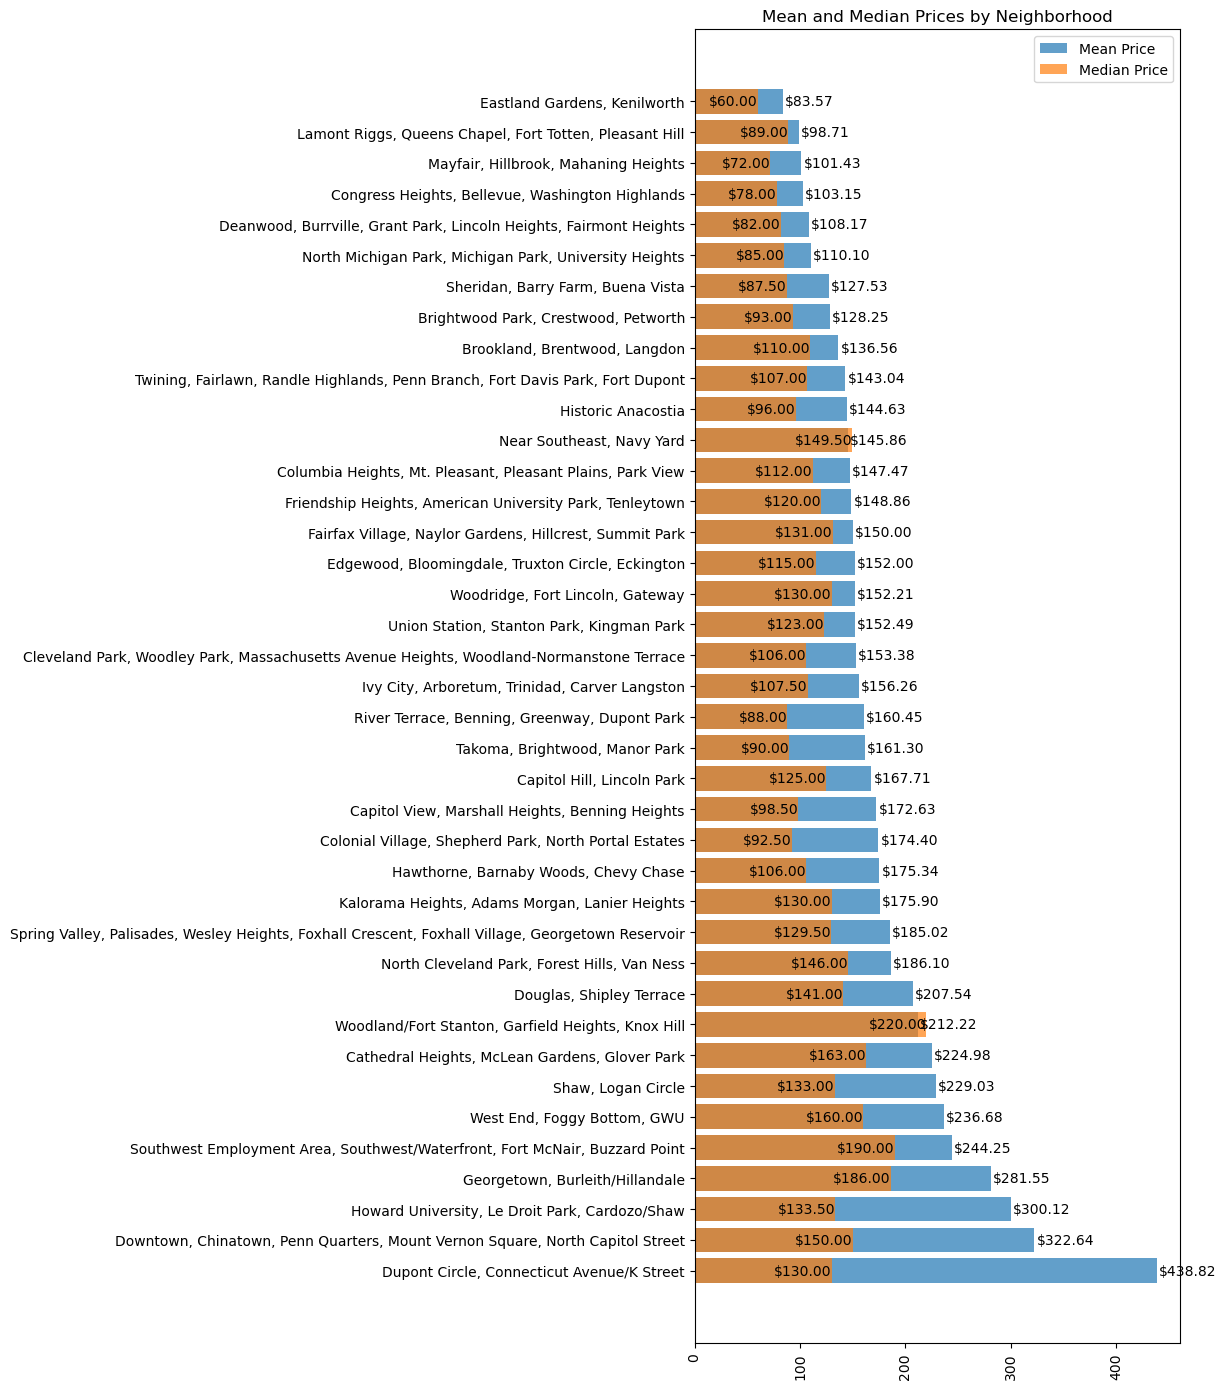

In [13]:
# plot mean and median price by
plt.figure(figsize=(12, 14))
plt.barh(grouped_df['neighbourhood'], grouped_df['mean'], label='Mean Price', alpha=0.7)
plt.barh(grouped_df['neighbourhood'], grouped_df['median'], label='Median Price', alpha=0.7)


plt.title('Mean and Median Prices by Neighborhood')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Place xticks on top of each bar
for index, (mean_value, median_value) in enumerate(zip(grouped_df['mean'], grouped_df['median'])):
    plt.text(median_value, index, f'${median_value:.2f}', va='center', multialignment='center', ha='right')
    plt.text(mean_value + 2, index, f'${mean_value:.2f}', va='center', multialignment='center')


# Show the plot
plt.show()

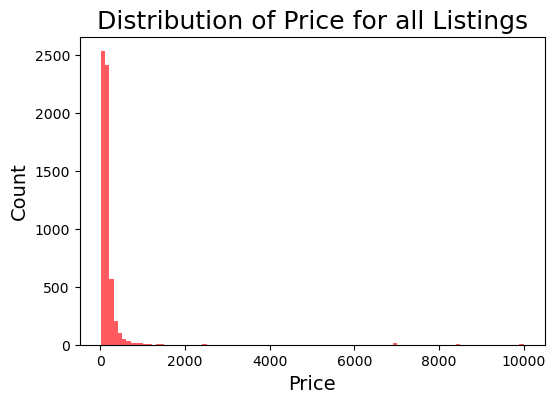

In [14]:
# Look at distribution of prices for full listings dataset
plt.figure(figsize=(6, 4))

plt.hist(listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price for all Listings', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count', fontdict={'fontsize': 14});


In [15]:
# look at cheapest listings
listings[listings['price'] <= 100].shape


(2252, 18)

In [16]:
2252/6853

0.3286152050196994

In [17]:
# how many listings are under $500
listings[listings['price'] < 500].shape

(5796, 18)

In [18]:
5796/6853

0.8457609805924413

In [19]:
# how many listings are over $500
listings[listings['price'] > 500].shape

(188, 18)

In [20]:
188/6853

0.027433240916386985

In [21]:
# how many listings are over $1000
listings[listings['price'] > 1000].shape

(56, 18)

In [22]:
56/6853

0.008171603677221655

In [23]:
# creating new dataframe 
listings = listings[listings['price'] < 1000]
listings.shape

(5936, 18)

In [24]:
5936/6853

0.8661899897854954

In [25]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5.936000e+03,5.936000e+03,0.0,5936.000000,5936.000000,5936.000000,5936.000000,5936.00000,4700.000000,5936.000000,5936.000000,5936.000000
mean,3.520770e+17,1.384672e+08,NaN,38.909942,-77.013060,151.235344,17.159704,59.33996,2.008649,29.664252,193.650775,15.283693
std,4.243244e+17,1.605425e+08,NaN,0.025041,0.031012,115.904731,32.430161,97.70243,2.004790,63.417202,135.905917,22.293214
min,3.686000e+03,4.492000e+03,NaN,38.819950,-77.112690,10.000000,1.000000,0.00000,0.010000,1.000000,0.000000,0.000000
25%,2.753978e+07,1.793457e+07,NaN,38.897171,-77.031940,85.000000,2.000000,1.00000,0.450000,1.000000,68.000000,0.000000
50%,5.024620e+07,6.166391e+07,NaN,38.909496,-77.013950,120.000000,3.000000,17.00000,1.460000,3.000000,196.000000,4.000000
75%,8.182303e+17,2.194932e+08,NaN,38.923275,-76.993855,175.000000,31.000000,75.00000,3.000000,17.250000,337.000000,24.000000
max,1.047931e+18,5.510398e+08,NaN,38.992140,-76.910920,999.000000,1125.000000,954.00000,28.480000,234.000000,365.000000,285.000000


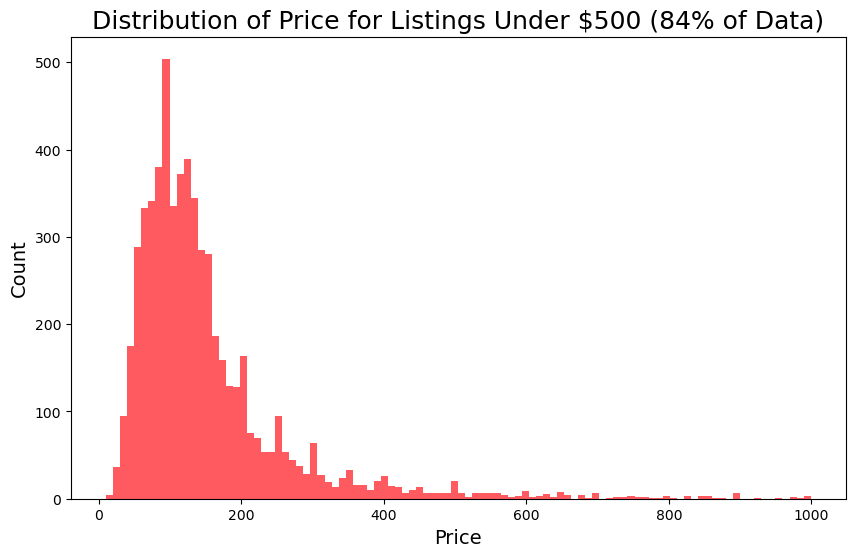

In [26]:
# Look at distribution of prices for adjusted listings dataset (without 5 largest outliers)
plt.figure(figsize=(10, 6))

plt.hist(listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price for Listings Under $500 (84% of Data)', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count', fontdict={'fontsize': 14});


In [27]:
# In above histogram, since much of the data seems to be between 0 and $1,000, creating a new df focusing on that
one_k_listings = listings[listings['price'] < 1000]
one_k_listings.shape

(5936, 18)

In [28]:
5936 / 6853

0.8661899897854954

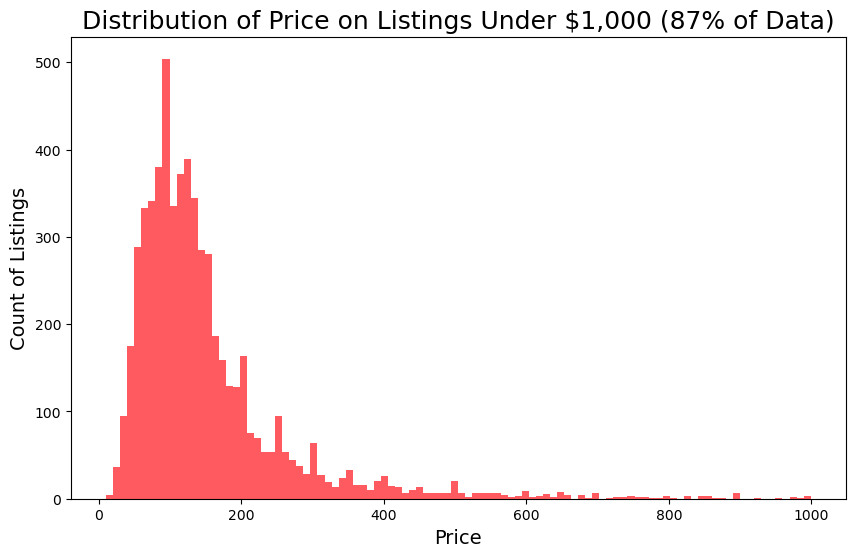

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(one_k_listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price on Listings Under $1,000 (87% of Data)', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count of Listings', fontdict={'fontsize': 14});

In [30]:
# The bulk of the data is still around $300 or lower
# Also logically - tourists might be deterred from a price above $300 a night
affordable_listings = listings[listings['price'] < 300]
affordable_listings.shape

(5452, 18)

In [31]:
5452 / 6853

0.7955639865752225

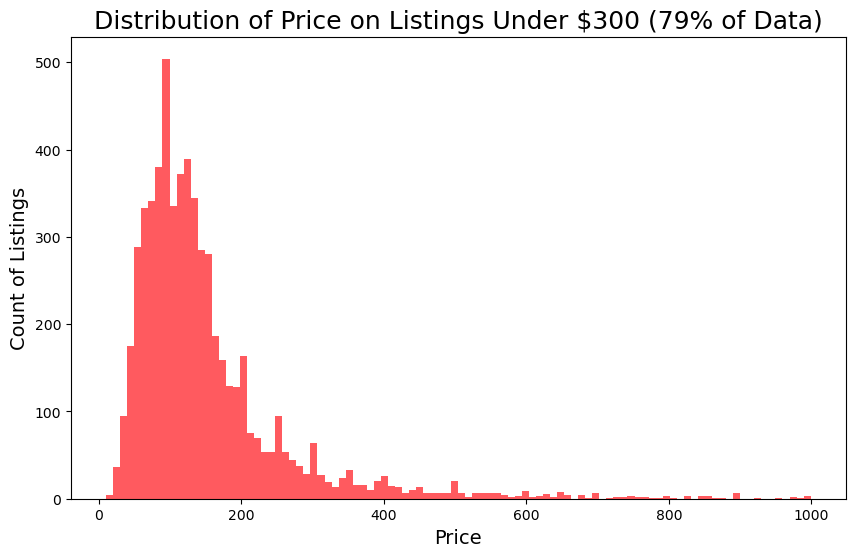

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(one_k_listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price on Listings Under $300 (79% of Data)', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count of Listings', fontdict={'fontsize': 14});

In [33]:
# The bulk of the data is still around $300 or lower
# Also logically - tourists might be deterred from a price above $300 a night
affordable_listings = listings[listings['price'] < 300]
affordable_listings.shape

(5452, 18)

In [34]:
5452 / 6853
## affordable_listings represents 79% of the data

0.7955639865752225

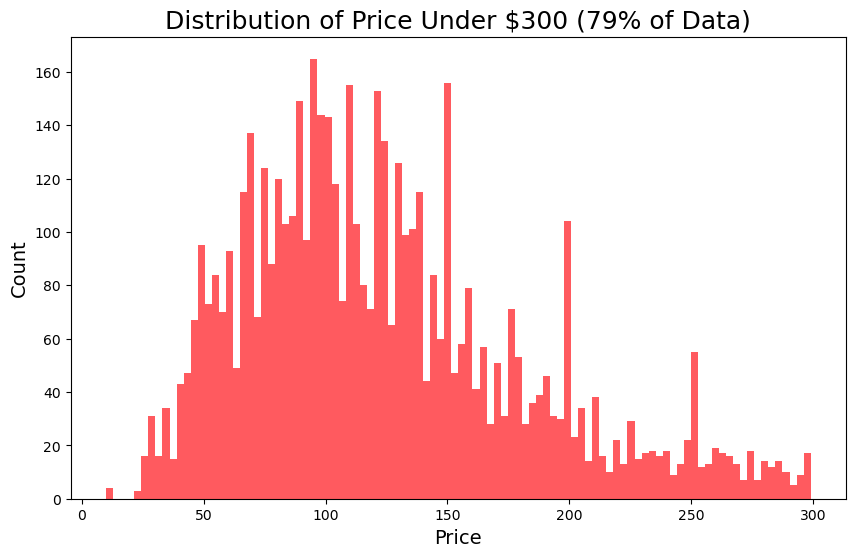

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(affordable_listings['price'], bins=100, color='#FF5A5F')
plt.title('Distribution of Price Under $300 (79% of Data)', fontdict={'fontsize': 18})
plt.xlabel('Price', fontdict={'fontsize': 14})
plt.ylabel('Count', fontdict={'fontsize': 14});
# even with affordable_listings, still right skewed

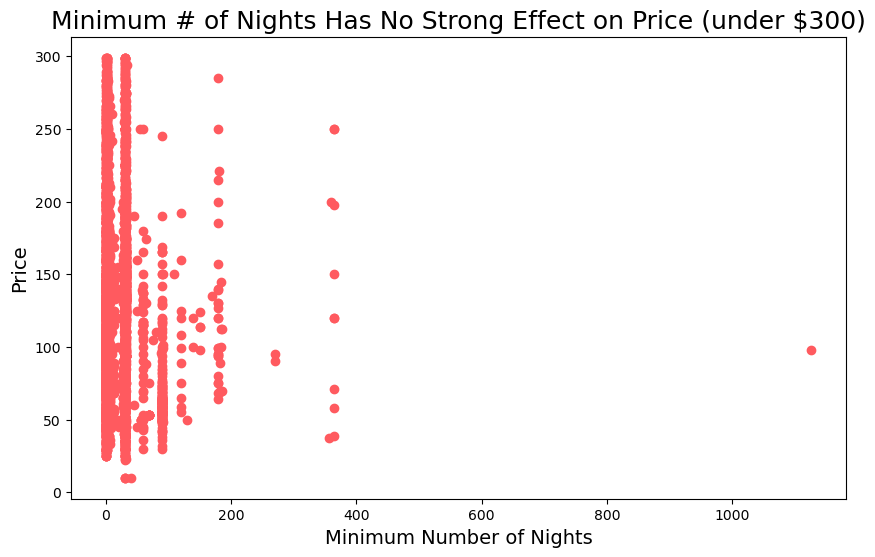

In [36]:
# Also look at relationship between price and minimum number of nights 
plt.figure(figsize=(10,6))

plt.scatter(affordable_listings['minimum_nights'], affordable_listings['price'], color='#FF5A5F')
plt.title('Minimum # of Nights Has No Strong Effect on Price (under $300)', fontdict={'fontsize': 18})
plt.xlabel('Minimum Number of Nights', fontdict={'fontsize': 14})
plt.ylabel('Price', fontdict={'fontsize': 14});
# doesn't seem to be much of a relationship

In [121]:
# What is the average price per neighborhood? 
hood_price = listings.groupby('neighbourhood')['price'].mean()
hood_price = pd.DataFrame(hood_price)
# round the price to 2 decimals
hood_price['price'] = hood_price['price'].round(2)
# look at 3 neighborhoods with cheapest averages
hood_price.sort_values('price').head(3)

,price
neighbourhood,
"Eastland Gardens, Kenilworth",83.57
"Lamont Riggs, Queens Chapel, Fort Totten, Pleasant Hill",98.71
"Mayfair, Hillbrook, Mahaning Heights",101.43


In [38]:
# look at 3 neighborhood with most expensive averages
hood_price.sort_values('price', ascending=False).head(3)

,price
neighbourhood,
"Georgetown, Burleith/Hillandale",224.78
"West End, Foggy Bottom, GWU",214.62
"Woodland/Fort Stanton, Garfield Heights, Knox Hill",212.22


In [39]:
average_price = listings_df['price'].mean()
print("Average price:", average_price)

Average price: 194.0116763969975


In [40]:
cheapest_price = listings_df['price'].min()
most_expensive_price = listings_df['price'].max()

print("Cheapest price:", cheapest_price)
print("Most expensive price:", most_expensive_price)

Cheapest price: 10.0
Most expensive price: 10000.0


In [41]:
# Shorten the neighborhood names
hood_labels = ['Brightwood Park','Brookland','Capitol Hill','Capitol View','Cathedral Heights','Cleveland Park',
               'Colonial Village','Columbia Heights','Congress Heights','Deanwood','Douglas','Downtown/Chinatown',
               'Dupont Circle','Eastland Gardens','Edgewood','Fairfax Village','Friendship Heights','Georgetown',
               'Chevy Chase', 'Historic Anacostia','Howard University','Trinidad','Adams Morgan','Fort Totten',
               'Mayfair','Navy Yard','North Cleveland Park','North Michigan Park','River Terrace','Shaw',
               'Southwest/Waterfront','Spring Valley','Takoma','Twining','Union Station','Foggy Bottom',
               'Woodland/Fort Stanton','Woodridge']

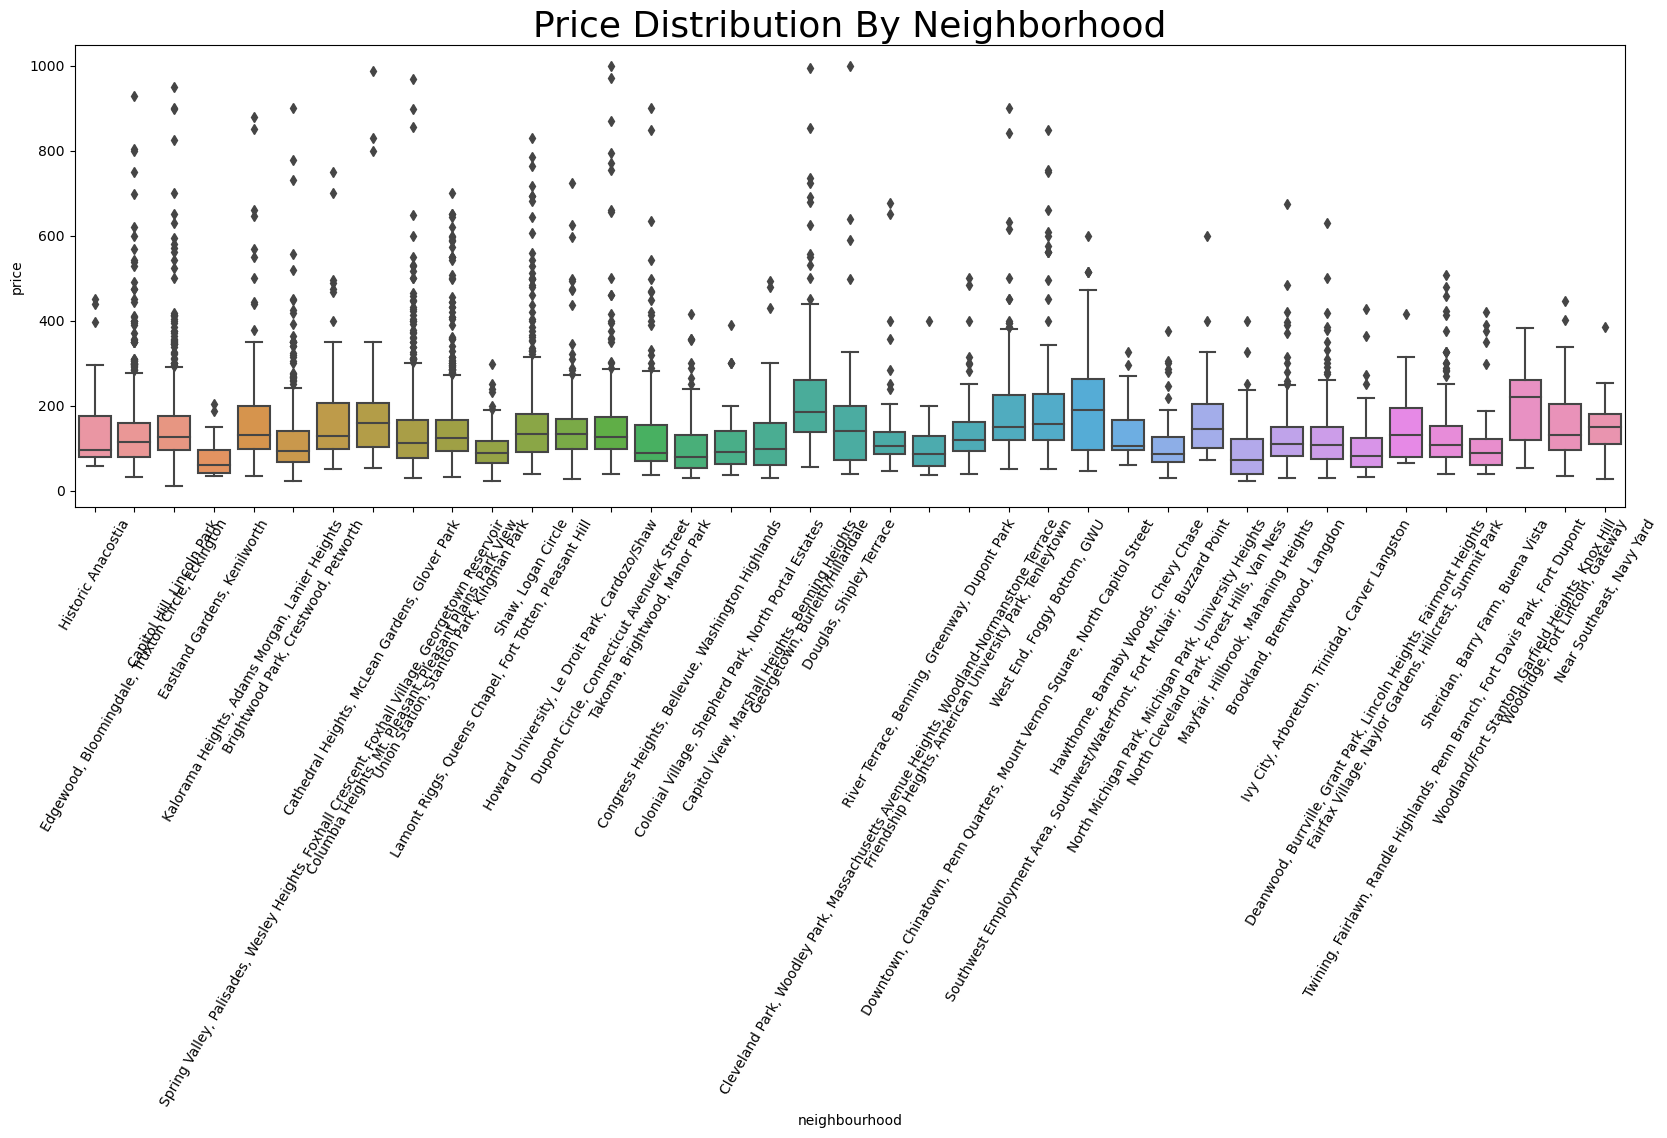

In [42]:
# Colored boxplots of price distribution in each neighbourhood
plt.figure(figsize=(20, 6))
plt.title('Price Distribution By Neighborhood', size=26)
sns.boxplot(x='neighbourhood', y='price', data=listings);
plt.xticks(rotation=60)
plt.savefig('Neighborhood Box plot.png')


In [43]:
#Hosts

In [44]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3686,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,4645,Vita,NaN,Historic Anacostia,38.86339,-76.98889,Private room,67.0,31,84,2023-08-30,0.53,1,365,3,NaN
1,3943,Townhouse in Washington · ★4.83 · 1 bedroom · ...,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91195,-77.00456,Private room,66.0,1,495,2023-11-22,2.78,5,252,46,Hosted License: 5007242201001033
2,4197,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.88719,-76.99472,Private room,135.0,7,58,2023-11-11,0.33,2,321,6,Hosted License: 5007242201000749
3,4529,Home in Washington · ★4.66 · 1 bedroom · 1 bed...,5803,Bertina,NaN,"Eastland Gardens, Kenilworth",38.90585,-76.94469,Private room,56.0,30,102,2019-07-05,0.58,2,179,0,Exempt
5,5589,Rental unit in Washington · ★4.50 · 1 bedroom ...,6527,Ami,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.91887,-77.04008,Entire home/apt,60.0,31,96,2023-08-17,0.55,1,121,1,NaN


In [45]:
# The 'calculated_host_listings_count' represents how many listings a given host has. 
lph_dict = {'calculated_host_listings_count': 'listings_per_host'}
listings.rename(columns=lph_dict, inplace=True)
listings[listings['listings_per_host'] < 2]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_per_host,availability_365,number_of_reviews_ltm,license
0,3686,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,4645,Vita,NaN,Historic Anacostia,38.863390,-76.988890,Private room,67.0,31,84,2023-08-30,0.53,1,365,3,NaN
5,5589,Rental unit in Washington · ★4.50 · 1 bedroom ...,6527,Ami,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.918870,-77.040080,Entire home/apt,60.0,31,96,2023-08-17,0.55,1,121,1,NaN
10,13744,Rental unit in Washington · ★4.84 · 1 bedroom ...,53927,Victoria,NaN,"Columbia Heights, Mt. Pleasant, Pleasant Plain...",38.928360,-77.031360,Entire home/apt,125.0,3,38,2023-11-14,0.23,1,82,3,Hosted License: 5007242201000873
14,27281,Rental unit in Washington · ★4.77 · 1 bedroom ...,117099,Stephen,NaN,"Union Station, Stanton Park, Kingman Park",38.900530,-76.991330,Entire home/apt,645.0,31,13,2016-07-14,0.08,1,364,0,NaN
18,62122,Home in Washington · ★4.85 · 2 bedrooms · 2 be...,301975,Sarah (And JT),NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.922380,-77.047090,Private room,95.0,5,128,2023-10-29,0.93,1,181,16,Hosted License: 5007242201000081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6804,1043737194236284066,Home in Washington · ★New · 2 bedrooms · 2 bed...,57028640,Isha,NaN,"Brightwood Park, Crestwood, Petworth",38.960740,-77.028676,Entire home/apt,180.0,1,0,NaN,NaN,1,259,0,Exempt
6808,1044595788964265297,Hotel in Washington · ★New · 1 bedroom · 1 bed...,544295893,Viceroy Washington DC,NaN,"Shaw, Logan Circle",38.908048,-77.032875,Private room,197.0,1,0,NaN,NaN,1,109,0,Exempt
6815,1044944208786187520,Home in Washington · ★New · 2 bedrooms · 1 bed...,550438099,Uche,NaN,"Takoma, Brightwood, Manor Park",38.962262,-77.021116,Private room,69.0,1,0,NaN,NaN,1,361,0,Hosted License: 5007242201003176
6817,1045288086241371886,Hotel in Washington · ★New · 1 bedroom · 1 pri...,544270577,"Hotel Zena, A Viceroy Urban Re",NaN,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.905082,-77.031398,Private room,159.0,1,0,NaN,NaN,1,93,0,Exempt


In [46]:
temp_df = ['host_id']==39930655
listings.rename(columns=lph_dict, inplace=True)
listings[listings['host_id']==39930655]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_per_host,availability_365,number_of_reviews_ltm,license
926,15734466,Rental unit in Washington · ★4.65 · 2 bedrooms...,39930655,Sojourn,NaN,"Capitol Hill, Lincoln Park",38.889210,-76.991196,Entire home/apt,119.0,1,289,2023-11-26,3.34,234,321,21,Exempt
1035,16405079,Home in Washington · ★4.72 · Studio · 1 bed · ...,39930655,Sojourn,NaN,"Dupont Circle, Connecticut Avenue/K Street",38.911310,-77.043990,Entire home/apt,63.0,1,432,2023-12-10,5.08,234,0,75,Exempt
1299,18288362,Home in Washington · ★4.77 · Studio · 1 bed · ...,39930655,Sojourn,NaN,"Dupont Circle, Connecticut Avenue/K Street",38.911370,-77.043630,Private room,67.0,1,418,2023-12-14,5.16,234,351,55,Exempt
1329,18598439,Home in Washington · ★4.77 · 1 bedroom · 1 bed...,39930655,Sojourn,NaN,"Dupont Circle, Connecticut Avenue/K Street",38.911370,-77.043630,Private room,54.0,1,404,2023-12-10,5.03,234,342,60,Hosted License: 5007242201002018
1359,18949151,Boutique hotel in Washington · ★4.80 · 1 bedro...,39930655,Sojourn,NaN,"Dupont Circle, Connecticut Avenue/K Street",38.911370,-77.043630,Hotel room,66.0,1,473,2023-12-12,5.95,234,0,54,Hosted License: 5007242201000611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,1034161103550936651,Rental unit in Washington · ★New · 1 bedroom ·...,39930655,Sojourn,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.917316,-77.011648,Entire home/apt,121.0,31,0,NaN,NaN,234,361,0,NaN
6755,1039116873298564268,Rental unit in Washington · ★New · 2 bedrooms ...,39930655,Sojourn,NaN,"Union Station, Stanton Park, Kingman Park",38.894997,-77.001416,Entire home/apt,207.0,1,0,NaN,NaN,234,338,0,Hosted License: 5007262201002761
6763,1039755303232779940,Rental unit in Washington · ★New · 2 bedrooms ...,39930655,Sojourn,NaN,"Capitol Hill, Lincoln Park",38.880590,-76.996090,Entire home/apt,195.0,31,0,NaN,NaN,234,321,0,NaN
6770,1039946519510516519,Rental unit in Washington · ★New · 4 bedrooms ...,39930655,Sojourn,NaN,"Capitol Hill, Lincoln Park",38.889155,-76.997247,Entire home/apt,525.0,31,0,NaN,NaN,234,337,0,NaN


In [47]:
2208/ 6853

#32% of all listings are the sole listing for that host

0.322194659273311

In [48]:
listings['availability_365'].value_counts()

0      951
365    536
364    139
363    103
180     85
      ... 
205      2
323      2
20       1
19       1
120      1
Name: availability_365, Length: 365, dtype: int64

In [49]:
average_availability = listings['availability_365'].mean()
print("Average availability over the year:", average_availability)


Average availability over the year: 193.65077493261455


In [50]:
temp_df = listings[listings['listings_per_host'] == 231]

In [51]:
temp_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'listings_per_host', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [52]:
# Create new variable for distribution of listings per host
# Listings.groupby('host_id')['id'].count()
listings['listings_per_host']

0         1
1         5
2         2
3         2
5         1
       ... 
6848    234
6849     28
6850     28
6851     28
6852      3
Name: listings_per_host, Length: 5936, dtype: int64

In [53]:
average_listings_per_host = listings.groupby('host_id')['id'].count().mean()
print("Average number of listings per host:", average_listings_per_host)


Average number of listings per host: 2.0128857239742284


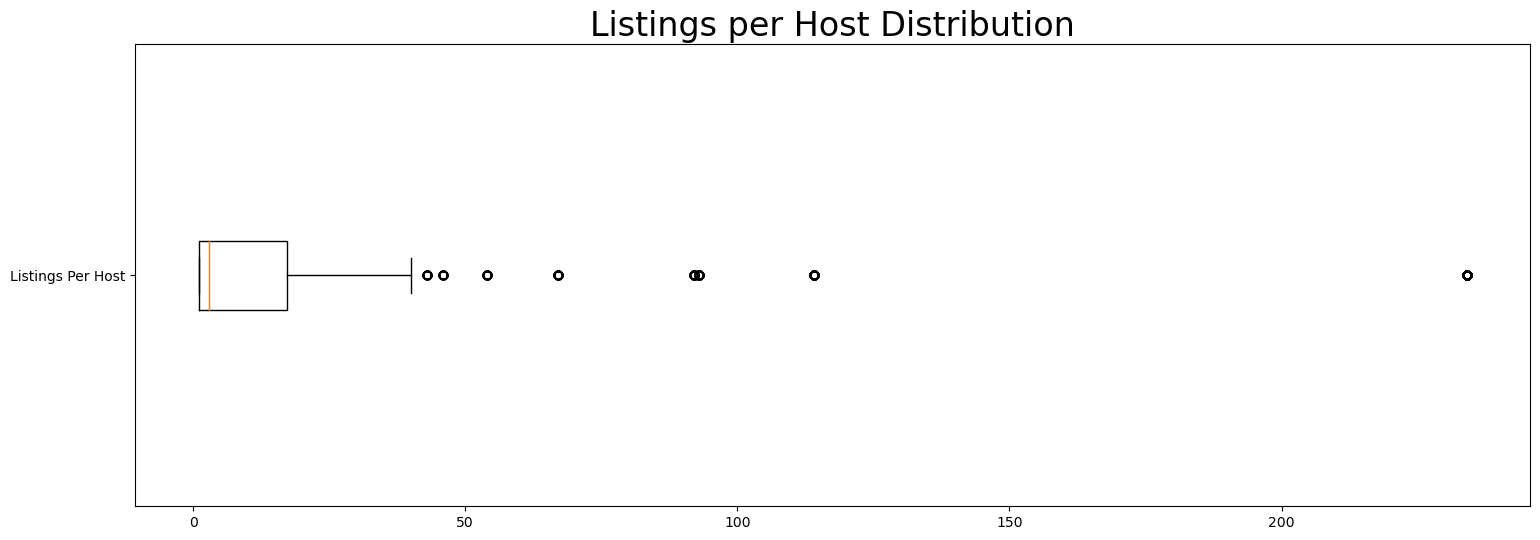

In [54]:
plt.figure(figsize=(18, 6))
plt.boxplot(listings['listings_per_host'], vert=False)
plt.title('Listings per Host Distribution', fontdict={'fontsize': 24})
plt.yticks(ticks=[1], labels=['Listings Per Host']);
# plt.xticks(ticks=[0, 2000, 4000, 6000, 8000, 10000], labels=['$0', '$2,000', '$4,000', '$6,000', '$8,000','$10,000']);

In [55]:
# One host has 231 properties - 'Sojourn'
Sojourn = listings[listings['host_id'] == 39930655 ]
# An analysis of Sojourn

In [56]:
host_id = 39930655

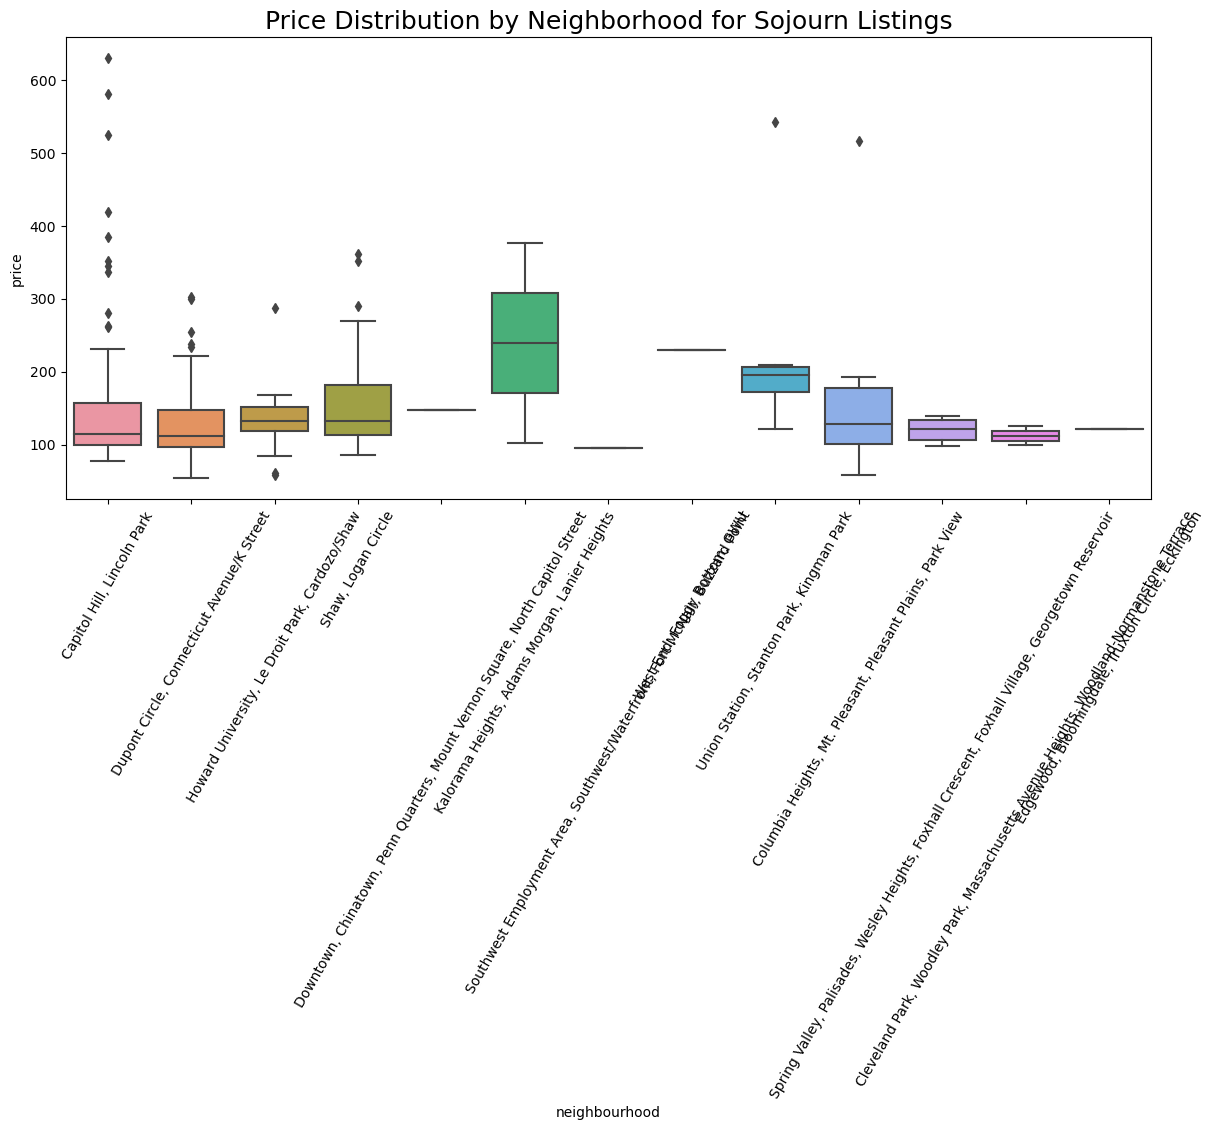

In [57]:
# Colored boxplots of price distribution in each neighbourhood
plt.figure(figsize=(14, 6))
plt.title('Price Distribution by Neighborhood for Sojourn Listings', size=18)
sns.boxplot(x='neighbourhood', y='price', data=Sojourn);
plt.xticks(rotation=60)
plt.savefig('Neighborhood Box plot.png')

In [58]:
Sojourn.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'listings_per_host', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [59]:
Sojourn.groupby('neighbourhood')['price'].mean().sort_values()

neighbourhood
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point                           95.000000
Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace             112.500000
Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir    119.750000
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    121.000000
Dupont Circle, Connecticut Avenue/K Street                                                           127.791667
Howard University, Le Droit Park, Cardozo/Shaw                                                       134.869565
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street                        147.000000
Capitol Hill, Lincoln Park                                                                           157.081395
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                

In [60]:
Sojourn.groupby('neighbourhood')['id'].count().sort_values()

neighbourhood
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street                         1
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                     1
Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point                           1
West End, Foggy Bottom, GWU                                                                           1
Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace              2
Kalorama Heights, Adams Morgan, Lanier Heights                                                        2
Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir     4
Union Station, Stanton Park, Kingman Park                                                             9
Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           10
Shaw, Logan Circle                                

In [61]:
Sojourn.groupby('room_type')['price'].mean()

room_type
Entire home/apt    152.031250
Hotel room          66.000000
Private room        60.666667
Name: price, dtype: float64

In [62]:
Sojourn['room_type'].value_counts()

Entire home/apt    224
Private room         6
Hotel room           1
Name: room_type, dtype: int64

In [63]:
Sojourn['price'].mean()

149.28571428571428

In [64]:
Sojourn['availability_365'].mean()

275.8787878787879

In [65]:
# Analysis of how much Sojourn makes from his listings
# Create an adjusted price variable - AirBnB takes 3% service fee for using their platform

Sojourn['adj_price'] = Sojourn['price'] - (Sojourn['price'] * .03) 


C:\Users\polska2207\AppData\Local\Temp\ipykernel_5052\4285458154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sojourn['adj_price'] = Sojourn['price'] - (Sojourn['price'] * .03)


In [66]:
# Create a yearly profit variable: the adjusted price multiplied by the availability of that listing in a year
Sojourn['yearly_profit'] = Sojourn['adj_price'] * Sojourn['availability_365']


C:\Users\polska2207\AppData\Local\Temp\ipykernel_5052\4201928381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sojourn['yearly_profit'] = Sojourn['adj_price'] * Sojourn['availability_365']


In [67]:
# The sum of yearly profit for all listings
Sojourn_annual_profit = Sojourn['yearly_profit'].sum()

# Using a 51.85% occupancy rate, calculate Sojourn' annual profit
Sojourn_annual_profit * .5185


4632916.594265

In [68]:
#Room Type

In [69]:
# Look at how many of each room type there are 
listings['room_type'].value_counts()

Entire home/apt    4545
Private room       1318
Shared room          63
Hotel room           10
Name: room_type, dtype: int64

In [70]:
listings['room_type'].value_counts(normalize=True)

Entire home/apt    0.765667
Private room       0.222035
Shared room        0.010613
Hotel room         0.001685
Name: room_type, dtype: float64

In [71]:
roomtype_value_counts = [4571, 1324, 63, 10]

In [72]:
roomtypes = ['Entire home/apt','Private room','Shared room', 'Hotel room']

In [73]:
# Average price per room type
listings.groupby('room_type')['price'].mean()

room_type
Entire home/apt    166.326513
Hotel room          46.300000
Private room       104.660091
Shared room         53.555556
Name: price, dtype: float64

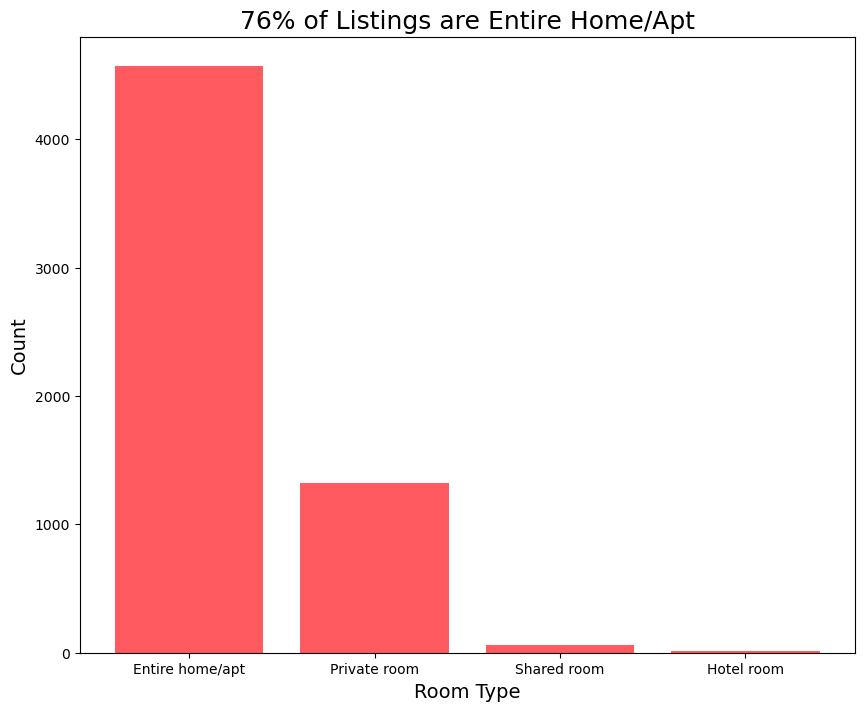

In [86]:
# Plot count of each room type to show what is most common
plt.figure(figsize=(10, 8))
plt.bar(x=roomtypes, height=roomtype_value_counts, color='#FF5A5F')
plt.title('76% of Listings are Entire Home/Apt', fontdict={'fontsize': 18})
plt.xlabel('Room Type', fontdict={'fontsize': 14})
plt.ylabel("Count", fontdict={'fontsize': 14});

In [75]:
# Which type of room gets the most reviews
listings.groupby('room_type')['number_of_reviews'].mean()

room_type
Entire home/apt     63.442244
Hotel room         104.200000
Private room        46.334598
Shared room         28.349206
Name: number_of_reviews, dtype: float64

In [76]:
total_reviews = listings['number_of_reviews'].sum()
print("Total number of reviews:", total_reviews)

Total number of reviews: 352242


In [117]:
#Group by host_id and calculate the total number of reviews for each host
host_reviews = listings.groupby('host_id')['reviews_per_month'].count().reset_index(name='total_reviews')

# Sort the data to find the host with the most reviews
host_most_reviews = host_reviews.sort_values(by='total_reviews', ascending=False).iloc[0]

# Retrieve the host with the most reviews
most_reviews_host_id = host_most_reviews['host_id']
most_reviews_count = host_most_reviews['total_reviews']

print(f"The host with ID {most_reviews_host_id} received the most reviews: {most_reviews_count} reviews.")


The host with ID 39930655 received the most reviews: 162 reviews.


In [151]:
# Filter the DataFrame to get the name of the host with host_id 39930655
host_name = data.loc[data['host_id'] == 39930655, 'host_name'].iloc[0]

print("The host with ID 39930655:", host_name)

The host with ID 39930655: Nicole


In [140]:
# Filter the DataFrame to get the listings for the host named Nicole
nicole_listings = data[data['host_name'] == 'Nicole']

# Print the listings for Nicole
print(nicole_listings)


            id                                               name    host_id  \
622    3589855     Designer's Stylish 1 Bedroom with Balcony View    1186037   
717    4069380                   Beautiful Historic DC Row House     4519661   
1177   6523994                 Lovely Bsmnt Apt mins from Capitol   31902851   
1178   6525271    DC Anacostia-7 mins to US CAPITOL, FREE PARKN!!   34125313   
1371   7614937    10 minute walk to downtown ~ comfortable studio   39930655   
...        ...                                                ...        ...   
9048  38216244                       Posh & Modern Dc Proper Flat   39930655   
9049  38216280                Luxury Flat for Business or Leisure   39930655   
9050  38216432                               Boutique Luxury Flat   39930655   
9133  38642582  The Raw Cone (420”Glamp” w/access to entire Ho...  218244999   
9178  38777196        Turn of the Century 1 Bedroom DuPont Circle   39930655   

     host_name  neighbourhood_group  \


In [119]:
#Reviews
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_per_host,availability_365,number_of_reviews_ltm,license
0,3686,Home in Washington · ★4.64 · 1 bedroom · 1 bed...,4645,Vita,NaN,Historic Anacostia,38.86339,-76.98889,Private room,67.0,31,84,2023-08-30,0.53,1,365,3,NaN
1,3943,Townhouse in Washington · ★4.83 · 1 bedroom · ...,5059,Vasa,NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91195,-77.00456,Private room,66.0,1,495,2023-11-22,2.78,5,252,46,Hosted License: 5007242201001033
2,4197,Home in Washington · ★4.85 · 1 bedroom · 1 bed...,5061,Sandra,NaN,"Capitol Hill, Lincoln Park",38.88719,-76.99472,Private room,135.0,7,58,2023-11-11,0.33,2,321,6,Hosted License: 5007242201000749
3,4529,Home in Washington · ★4.66 · 1 bedroom · 1 bed...,5803,Bertina,NaN,"Eastland Gardens, Kenilworth",38.90585,-76.94469,Private room,56.0,30,102,2019-07-05,0.58,2,179,0,Exempt
5,5589,Rental unit in Washington · ★4.50 · 1 bedroom ...,6527,Ami,NaN,"Kalorama Heights, Adams Morgan, Lanier Heights",38.91887,-77.04008,Entire home/apt,60.0,31,96,2023-08-17,0.55,1,121,1,NaN


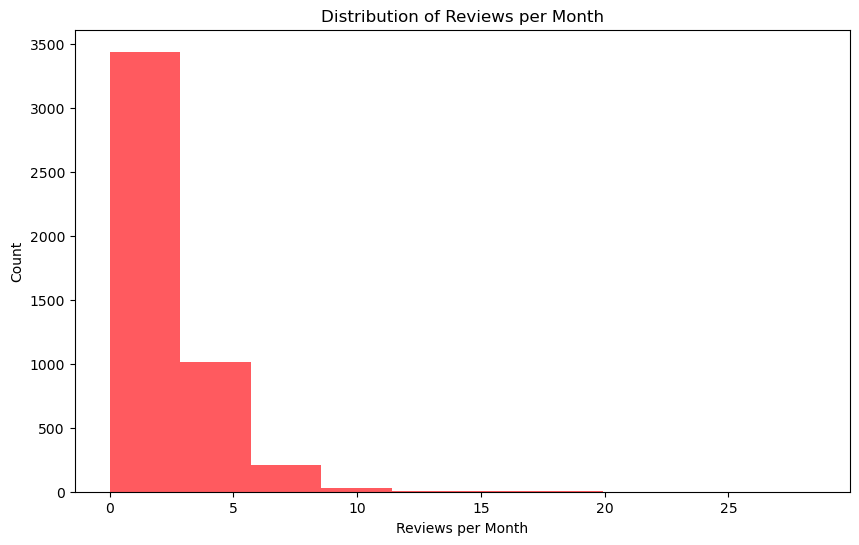

In [78]:
# Reviews per month 
plt.figure(figsize=(10, 6))
plt.hist(listings['reviews_per_month'], color='#FF5A5F')
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Count');

In [79]:
listings['reviews_per_month'].mean()

2.008648936170213

In [80]:
average_reviews_per_month = listings['reviews_per_month'].mean()
print("Average Reviews per Month: ", average_reviews_per_month)

Average Reviews per Month:  2.008648936170213


In [81]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,listings_per_host,availability_365,number_of_reviews_ltm
count,5.936000e+03,5.936000e+03,0.0,5936.000000,5936.000000,5936.000000,5936.000000,5936.00000,4700.000000,5936.000000,5936.000000,5936.000000
mean,3.520770e+17,1.384672e+08,NaN,38.909942,-77.013060,151.235344,17.159704,59.33996,2.008649,29.664252,193.650775,15.283693
std,4.243244e+17,1.605425e+08,NaN,0.025041,0.031012,115.904731,32.430161,97.70243,2.004790,63.417202,135.905917,22.293214
min,3.686000e+03,4.492000e+03,NaN,38.819950,-77.112690,10.000000,1.000000,0.00000,0.010000,1.000000,0.000000,0.000000
25%,2.753978e+07,1.793457e+07,NaN,38.897171,-77.031940,85.000000,2.000000,1.00000,0.450000,1.000000,68.000000,0.000000
50%,5.024620e+07,6.166391e+07,NaN,38.909496,-77.013950,120.000000,3.000000,17.00000,1.460000,3.000000,196.000000,4.000000
75%,8.182303e+17,2.194932e+08,NaN,38.923275,-76.993855,175.000000,31.000000,75.00000,3.000000,17.250000,337.000000,24.000000
max,1.047931e+18,5.510398e+08,NaN,38.992140,-76.910920,999.000000,1125.000000,954.00000,28.480000,234.000000,365.000000,285.000000


In [82]:
]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,listings_per_host,availability_365,number_of_reviews_ltm,license
57,453315,Guest suite in Washington · ★4.88 · 1 bedroom ...,2252538,Adam And Jen,NaN,"Union Station, Stanton Park, Kingman Park",38.895380,-76.986480,Entire home/apt,85.0,2,954,2023-11-26,6.76,1,0,62,Hosted License: 5007242201000823
218,3633359,Townhouse in Washington · ★4.97 · Studio · 1 b...,5047005,Terry & Mark,NaN,"Capitol View, Marshall Heights, Benning Heights",38.882960,-76.941000,Entire home/apt,79.0,2,384,2023-12-10,6.17,1,171,83,Hosted License: 5007242201000215
277,4545885,Rental unit in Washington · ★4.69 · 1 bedroom ...,22731277,Mark,NaN,"Union Station, Stanton Park, Kingman Park",38.901640,-77.002060,Entire home/apt,115.0,1,902,2023-11-30,8.20,3,0,128,Hosted License: 5007242201001799
350,5755232,Rental unit in Washington · ★4.91 · 1 bedroom ...,10152762,Alan,NaN,"Shaw, Logan Circle",38.911310,-77.021050,Entire home/apt,117.0,2,659,2023-11-26,6.19,1,143,69,Hosted License: 5007242201000426
469,8353034,Guest suite in Washington · ★4.92 · Studio · 1...,44025619,Clifford,NaN,"Takoma, Brightwood, Manor Park",38.983090,-77.024930,Private room,71.0,1,725,2023-12-11,7.23,1,0,94,Hosted License: 5007242201001036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6510,1005799808157085162,Home in Washington · ★5.0 · 5 bedrooms · 5 bed...,542557315,Eric,NaN,"Congress Heights, Bellevue, Washington Highlands",38.840853,-77.004604,Entire home/apt,160.0,1,21,2023-12-15,10.86,1,305,21,Exempt
6523,1008231274442060198,Home in Washington · ★5.0 · 1 bedroom · 1 bed ...,10421039,Omid,NaN,"Cleveland Park, Woodley Park, Massachusetts Av...",38.923170,-77.055010,Entire home/apt,116.0,1,8,2023-12-17,6.32,1,227,8,Hosted License: 5007242201003116<br />Unhosted...
6568,1013702200430291118,Rental unit in Washington · ★4.31 · Studio · 1...,219493221,Sonder (D.C.),NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.908674,-77.010111,Entire home/apt,94.0,2,16,2023-11-25,10.43,46,362,16,Exempt
6571,1013711657803937381,Rental unit in Washington · ★4.47 · 1 bedroom ...,219493221,Sonder (D.C.),NaN,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.908430,-77.008310,Entire home/apt,103.0,2,19,2023-11-27,12.67,46,364,19,Exempt


In [83]:
# Uniques license
# Strip actual license numbers to group licensed operators

license_df = listings_df.copy()
license_df['license'] = license_df['license'].str.split(':').str[0]

print(len(license_df.license.unique()))
print(license_df.license.unique())
value_count = license_df.license.value_counts(dropna=False)
print(f'Total: {value_count.sum()}')

# Create a pandas DataFrame for the value counts
value_counts_df = pd.DataFrame({'License Type': license_df.license.unique(), 'Count': value_count}).reset_index(drop=True)

# Print the value counts DataFrame
value_counts_df

4
[nan 'Hosted License' 'Exempt' 'Unhosted License']
Total: 6853


,License Type,Count
0,NaN,2770
1,Hosted License,2554
2,Exempt,1325
3,Unhosted License,204


In [84]:
# Drop misc
value_counts_df = value_counts_df.iloc[:4]
value_counts_df['License Type'].fillna('Unlicensed', inplace=True)
value_counts_df

C:\Users\polska2207\AppData\Local\Temp\ipykernel_5052\2234688728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value_counts_df['License Type'].fillna('Unlicensed', inplace=True)


,License Type,Count
0,Unlicensed,2770
1,Hosted License,2554
2,Exempt,1325
3,Unhosted License,204


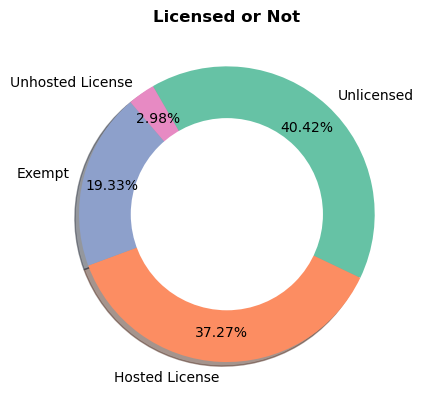

In [85]:
# donut chart
import seaborn as sns

# cmap = plt.cm.get_cmap('tab20c', 4)
# colors = cmap.colors
colors = sns.color_palette("Set2", n_colors=4)
# colors = sns.color_palette("pastel", n_colors=4)
# colors = sns.color_palette("Accent", n_colors=4)
# colors = sns.color_palette("tab10", n_colors=4) # the default


# Plot the pie chart
plt.pie(
    value_counts_df['Count'],
    labels=value_counts_df['License Type'],
    # explode=(0.03, 0.15, 0.03, 0.03),
    colors=colors,
    shadow=True,
    startangle=120,
    autopct="%1.2f%%",
    pctdistance=0.8,
    counterclock=False,
)

# Add title
plt.title("Licensed or Not", fontweight="bold")

# Add a donut hole
donut = plt.Circle((0, 0), 0.65, facecolor="white")
plt.gcf().gca().add_artist(donut)

# Show the plot
plt.show()